In [182]:
import os
from pathlib import Path
import sqlite3
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import warnings
from tqdm import tqdm


pydlem_dir = Path(r'C:\Users\CNB968\OneDrive - MT\GitHub\pydlem')
os.chdir(pydlem_dir)

import dlem


Initializing daily lake evaporation model...


In [184]:
new_mod = dlem.CreateModel()
new_mod.load_datafile(pydlem_dir / 'examples/tr2100_test_datafile.nc')
new_mod.run_model(start='2018-01-01', end='2022-12-31', sim_ice=True)

C:\Users\CNB968\OneDrive - MT\GitHub\pydlem\dlem\model.py:75: UserWarning: There are missing LAKE DEPTH values for the run time period, missing values will be propogated to the model outputs.
  warnings.warn(
C:\Users\CNB968\OneDrive - MT\GitHub\pydlem\dlem\model.py:80: UserWarning: There are missing LAKE AREA values for the run time period, missing values will be propogated to the model outputs.
  warnings.warn(
C:\Users\CNB968\OneDrive - MT\GitHub\pydlem\dlem\model.py:85: UserWarning: There are missing FETCH values for the run time period, missing values will be propogated to the model outputs.
  warnings.warn(
C:\Users\CNB968\OneDrive - MT\GitHub\pydlem\dlem\model.py:213: UserWarning: Missing values detected, this may lead to unequal length columns. Heat Storage calculation will use a slower method.
  warnings.warn(


Estimating ice cover...


100%|██████████| 1115/1115 [00:04<00:00, 261.41it/s]


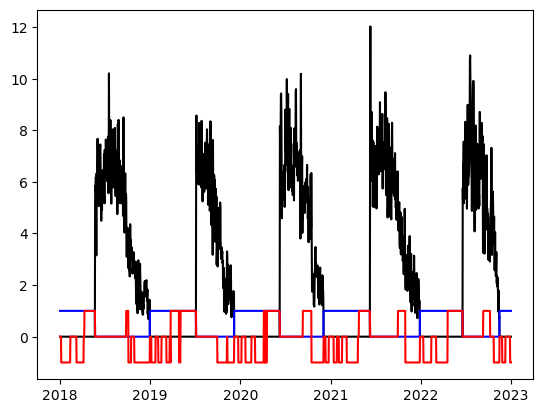

In [187]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.plot_date(new_mod.outputs.time, new_mod.outputs.evap.values[:,1], 'k-')
ax.plot_date(new_mod.outputs.time, new_mod.outputs.ice.values[:,1], 'b-')
ax.plot_date(new_mod.outputs.time, new_mod.outputs.lags.values[:,1], 'r-')

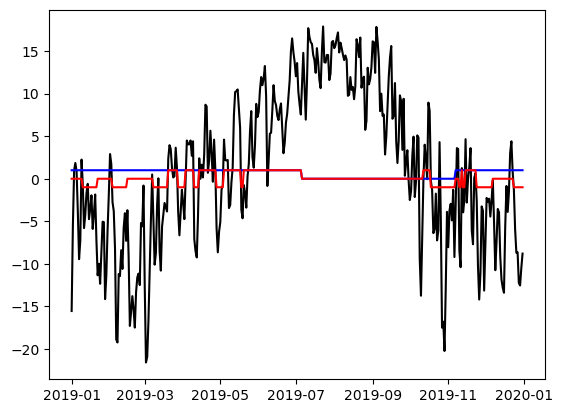

In [136]:
pltds = WY_Rs.inputs.sel(time=slice('2020-01-01', '2020-12-31'))
ax = plt.axes()
#ax.plot_date(pltds.time, pltds.LakeDepth.values[:,0], 'k-')
ax.plot_date(airT_s.time, airT_s.values[:,0], 'k-')
ax.plot_date(WY_Rs.outputs.time, WY_Rs.outputs.ice.values[:,3], 'b-')
ax.plot_date(WY_Rs.outputs.time, WY_Rs.outputs.lags.values[:,3], 'r-')

In [168]:
airtemp.loc['2020-01-01':'2020-01-13'].values[3].mean()
if np.array([]).size == 0:
    print("yes")

yes


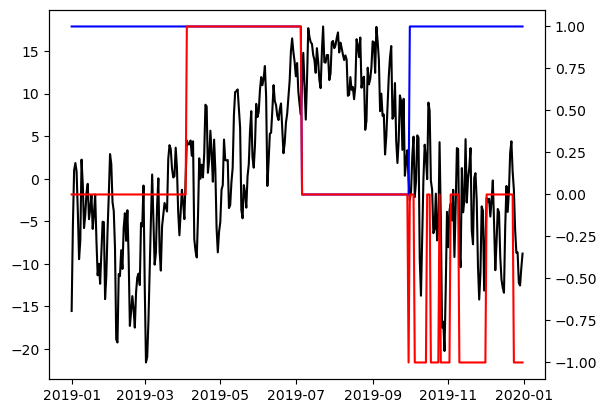

In [17]:
year = '2019'
pltds = frz_ds.sel(time=slice('{0}-01-01'.format(year), '{0}-12-31'.format(year)))
ax = plt.axes()
ax2 = ax.twinx()
ax.plot_date(pltds.time, pltds.AirTemp.values[:,0], 'k-')
ax2.plot_date(pltds.time, pltds.ice.values[:,0], 'b-')
ax2.plot_date(pltds.time, pltds.lags.values[:,0], 'r-')
